In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
plt.rcParams.update({'font.size': 20})

Note: All the codes are written in numpy arrays unless stated otherwise, to make the program run faster.

## Euler's method

Examples are taken from Newman textbook (solved examples)

In [3]:
alpha=1
beta=0.5
gamma=0.5
delta=2

def f(r,t):
    x,y=r[0],r[1]
    fx,fy = alpha*x-beta*x*y, gamma*x*y-delta*y
    return np.array([fx,fy])

## 2nd order Runge-Kutta Method

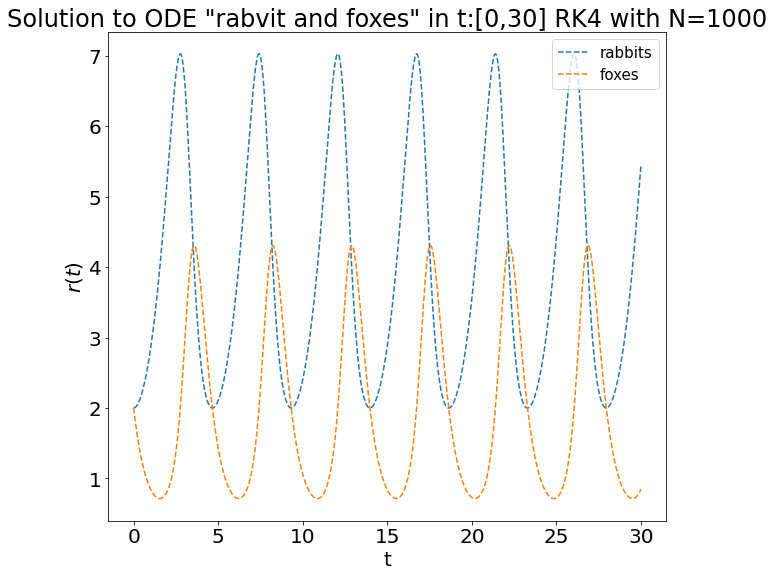

In [4]:
###RK4
name='RK4'
a,b,N= 0 , 30, 1000
t=np.linspace(a,b,N)
h=t[1]-t[0]
r=np.empty((N,2))  ## r vector started with all zeros
r[0]= 2,2
for i in range(N-1):
        k1=h*f(r[i],t[i])
        k2=h*f(r[i]+0.5*k1,t[i]+0.5*h)
        r[i + 1] = r[i] + k2
x,y=r[:,0],r[:,1]
###ploting the results
fig = plt.figure(figsize=(10,9))
plt.xlabel("t")
plt.ylabel('$r(t)$')
plt.title('Solution to ODE "rabvit and foxes" in t:[0,30] '+name+" with N="+str(N))
plt.plot(t,x,'--',label='rabbits')   
plt.plot(t,y,'--',label='foxes')  
plt.legend(loc='best',fontsize=15)
plt.show()

In [5]:
def f(x,t):
    return -x**3+np.sin(t)

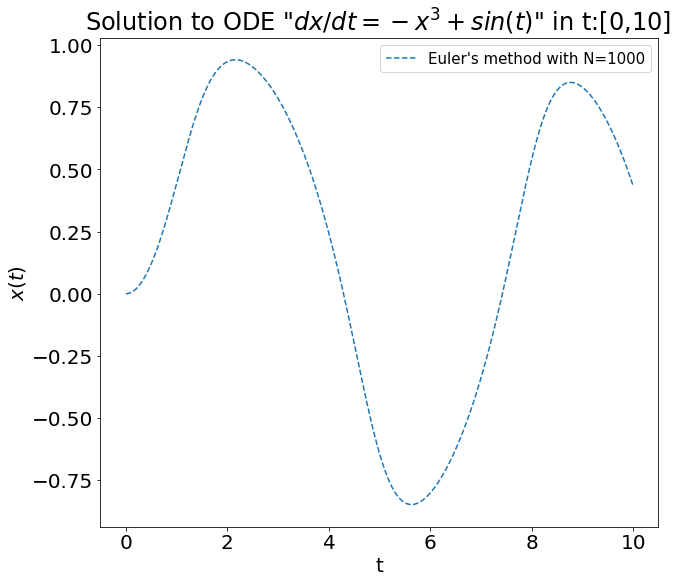

In [6]:
name="Euler's method"
##Euler Method in interval t: [0,10]
def Euler_method(N,a,b,i0):
    t=np.linspace(a,b,N)  ## N t values between a & b
    h=t[1]-t[0]   ###stepsize
    x=np.full_like(t,0)
    x[0]=i0     ##initial value of x at t=a is given as i0 (input in the function)
    for i in range(len(x)-1):
        x[i + 1] = x[i] + h*f(x[i], t[i])
    return x,t
N,a,b,i0=1000,0,10,0
x,t=Euler_method(N,a,b,i0)   ## x(t) and t values 

###Let's plot the result
fig = plt.figure(figsize=(10,9))
plt.xlabel("t")
plt.ylabel('$x(t)$')
plt.title('Solution to ODE "$dx/dt = -x^3 + sin(t)$" in t:[0,10] ')
plt.plot(t,x,'--',label=name+" with N="+str(N))
plt.legend(loc='best',fontsize=15)
plt.show()

## 4th order Runge-Kutta Method

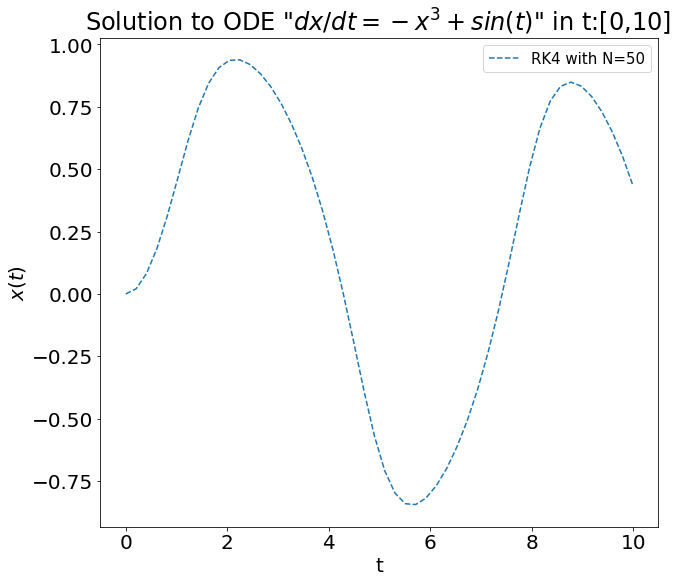

In [7]:
name='RK4'
def RK4(N,a,b,i0):
    t=np.linspace(a,b,N)  ## N t values between a & b
    h=t[1]-t[0]   ###stepsize
    x=np.full_like(t,0)
    x[0]=i0    ##initial value of x at t=0 is given as 0
    for i in range(len(x)-1):
        k1=h*f(x[i],t[i])
        k2=h*f(x[i]+0.5*k1,t[i]+0.5*h)
        k3=h*f(x[i]+0.5*k2,t[i]+0.5*h)
        k4=h*f(x[i]+k3,t[i]+h)
        x[i + 1] = x[i] + (k1+2*k2+2*k3+k4)/6
    return x,t
n4=50
x4,t4=RK4(N=n4,a=0,b=10,i0=0)   ## x(t) and t values for RK4 with N=50
###Let's plot the result
fig = plt.figure(figsize=(10,9))
plt.xlabel("t")
plt.ylabel('$x(t)$')
plt.title('Solution to ODE "$dx/dt = -x^3 + sin(t)$" in t:[0,10] ')
plt.plot(t4,x4,'--',label= name+" with N="+str(n4))
plt.legend(loc='best',fontsize=15)
plt.show()

## RK4 for multiple variable ODE 

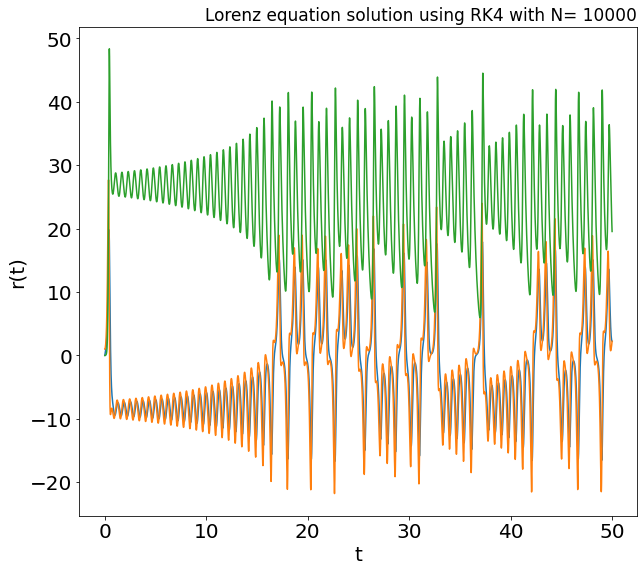

In [8]:
### Solving Lorenz equations
name='RK4'
def f(r,t):
    sig=10
    R=28
    B=8/3
    x = r[0]
    y = r[1]
    z = r[2] 
    fx = sig*(y - x)
    fy = R*x - y -x*z
    fz = x*y - B*z
    return np.array([fx,fy,fz],float)

a = 0.0
b = 50
N = 10000
h = (b-a)/N

t=np.arange(a,b,h) 
r=np.zeros((len(t),3))
r[0,0],r[0,1],r[0,2]=0,1,0
for i in range(len(t)-1):
    k1=h*f(r[i],t[i])
    k2=h*f(r[i]+0.5*k1,t[i]+0.5*h)
    k3=h*f(r[i]+0.5*k2,t[i]+0.5*h)
    k4=h*f(r[i]+k3,t[i]+h)
    r[i + 1] = r[i] + (k1+2*k2+2*k3+k4)/6

xp=r[:,0]
yp=r[:,1]
zp=r[:,2]
    
fig = plt.figure(figsize=(10,9))
plt.xlabel("t")
plt.ylabel("r(t)")               
plt.title('Lorenz equation solution using '+name+' with N= '+str(N) ,fontsize=17,loc='right')
plt.plot(t,xp)
plt.plot(t,yp)
plt.plot(t,zp)
plt.show()

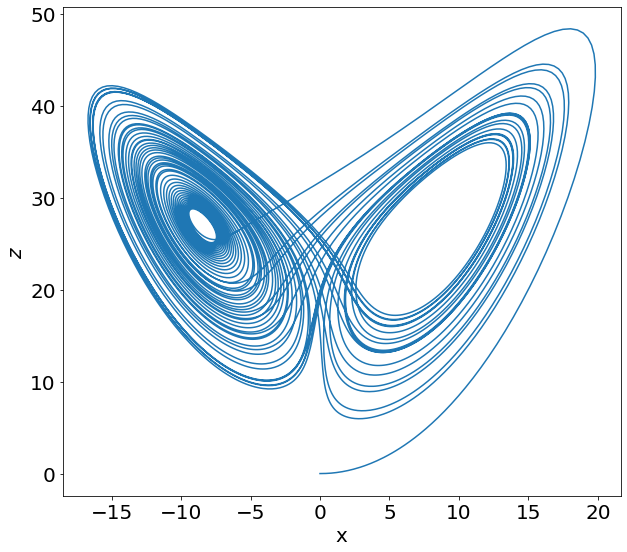

In [9]:
fig = plt.figure(figsize=(10,9))
plt.xlabel("x")
plt.ylabel("$z$")    
plt.plot(xp,zp)
plt.show()